A_ut shape: (25600, 16384)
x shape: (2, 128, 128)
y shape: (25600,)
y reshaped to: (128, 200)
0.07864692142563873


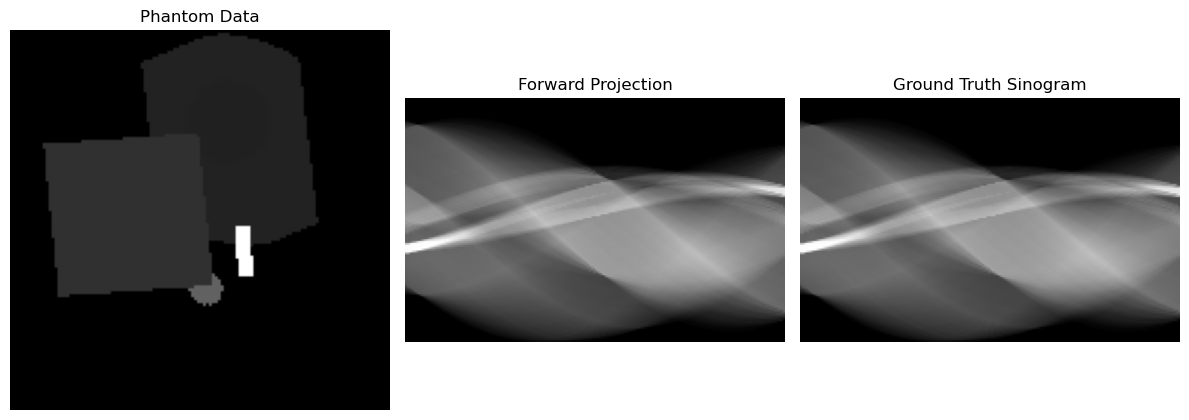

x_reconstructed shape: (128, 128)


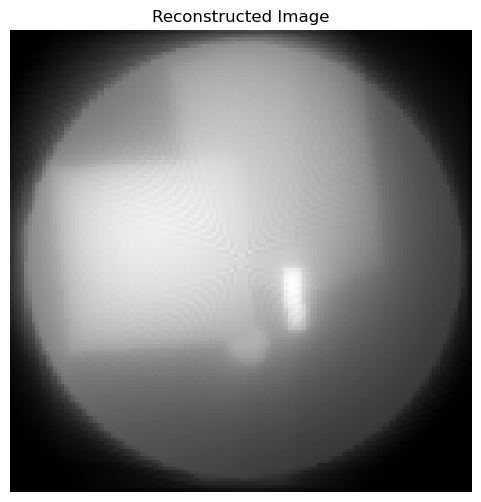

Min/Max of Phantom: 0.0/2.705002592622282e+24
Min/Max of Forward Projection: 0.0/0.0002705008353444476
Min/Max of Ground Truth Sinogram: 0.0/3.05711322710343e-05
Min/Max of Reconstructed Image: 0.0/1.3256836799842925e-31


In [1]:
# Load the A_ut A_ub and A_tb matrices from the file and test them on forward projections of our phantom data

import numpy as np
import sys
import os
import matplotlib.pyplot as plt

data_folder: str = '../data_discretised/'

A_ut: np.ndarray = np.load(f'{data_folder}A_ut.npy')
#A_ub: np.ndarray = np.load(f'{data_folder}A_ub.npy')
#A_tb: np.ndarray = np.load(f'{data_folder}A_tb.npy')

print(f'A_ut shape: {A_ut.shape}')
#print(f'A_ub shape: {A_ub.shape}')
#print(f'A_tb shape: {A_tb.shape}')

# Load the phantom data
x: np.ndarray = np.load(os.path.join(data_folder, 'phan-96.npy'))

gt_sino: np.ndarray = np.load(os.path.join(data_folder, 'sino-96.npy'))

print(f'x shape: {x.shape}')

# Forward projection
y: np.ndarray = A_ut @ x[0].ravel() #np.sum(x, axis=0).ravel()

print(f'y shape: {y.shape}')
y = y.reshape((128, -1))
print(f'y reshaped to: {y.shape}')

print(f'{np.sum(y - np.sum(gt_sino, axis=-1))}')

# Plot the Phantom Data, Forward projection, and Ground Truth Sinogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(x[0], cmap='gray')
plt.title('Phantom Data')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(y, cmap='gray')
plt.title('Forward Projection')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(np.sum(gt_sino, axis=-1), cmap='gray')
plt.title('Ground Truth Sinogram')
plt.axis('off')
plt.tight_layout()
plt.show()


# Try applying the transpose of the matrix to the sinogram
x_reconstructed: np.ndarray = A_ut.T @ y.ravel()
x_reconstructed = x_reconstructed.reshape((128, -1))
print(f'x_reconstructed shape: {x_reconstructed.shape}')
x_reconstructed = x_reconstructed.reshape(x[0].shape)
# Plot the reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(x_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

# Print min and max vaues of original phantom, forward projection, original sinogram, and reconstructed image
print(f'Min/Max of Phantom: {np.min(x[0])}/{np.max(x[0])}')
print(f'Min/Max of Forward Projection: {np.min(y)}/{np.max(y)}')
print(f'Min/Max of Ground Truth Sinogram: {np.min(gt_sino)}/{np.max(gt_sino)}')
print(f'Min/Max of Reconstructed Image: {np.min(x_reconstructed)}/{np.max(x_reconstructed)}')
